<a href="https://colab.research.google.com/github/EnigmaCipher/Trading_In_Alpaca/blob/main/alpaca_trading_open.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

!pip install alpaca-trade-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 21.9 MB/s eta 0:00:00
Reason for being yanked: This version includes overly restrictive multidict upper boundary disallowing multidict v6+. The previous patch version didn't have that and this is now causing dependency resolution problems for the users who have an "incompatible" version pinned. This is not really necessary anymore and will be addressed in the next release v3.8.3

https://github.com/aio-libs/aiohttp/pull/6950
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.5
    Uninstalling msgpack-1.0.5

In [5]:
import configparser as ConfigParser
import alpaca_trade_api as tradeapi
import asyncio

configParser = ConfigParser.RawConfigParser()
configFile = 'config.cfg'
configParser.read(configFile)
API_KEY = configParser.get('alpaca', 'api_key')
API_SECRET = configParser.get('alpaca', 'api_secret')
rest_api = tradeapi.rest.REST (API_KEY, API_SECRET, base_url= 'https://paper-api.alpaca.markets')


In [6]:
account = rest_api.get_account ()
account


Account({   'account_blocked': False,
    'account_number': 'PA30T524JFTD',
    'accrued_fees': '0',
    'admin_configurations': {},
    'balance_asof': '2023-08-23',
    'bod_dtbp': '0',
    'buying_power': '199070',
    'cash': '100000',
    'created_at': '2023-08-25T01:17:06.375002Z',
    'crypto_status': 'ACTIVE',
    'crypto_tier': 0,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'effective_buying_power': '199070',
    'equity': '100000',
    'id': 'ee6336e1-ed30-4569-a61c-c701cb9f0267',
    'initial_margin': '465',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '0',
    'maintenance_margin': '0',
    'multiplier': '2',
    'non_marginable_buying_power': '99070',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'portfolio_value': '100000',
    'position_market_value': '0',
    'regt_buying_power': '199070',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma':

In [7]:
account.status

'ACTIVE'

In [8]:
clock = rest_api.get_clock()
if clock.is_open:
  print("Market Is open")
else:
  time_to_open = clock.next_open - clock.timestamp
print (f"Market is closed now. It will open in {time_to_open.total_seconds()//60//60} hours")

Market is closed now. It will open in 9.0 hours


In [9]:
order_info = rest_api.submit_order(symbol='AAPL',
                                   notional=500,
                                   side='buy',
                                   type='market',
                                   time_in_force="day")
order_info

Order({   'asset_class': 'us_equity',
    'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
    'canceled_at': None,
    'client_order_id': '2985a8f8-cb32-4914-a266-617719d231e5',
    'created_at': '2023-08-25T04:10:04.40110099Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '6e941249-6af0-41d5-9c3e-101de7573968',
    'legs': None,
    'limit_price': None,
    'notional': '500',
    'order_class': '',
    'order_type': 'market',
    'qty': None,
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'source': None,
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2023-08-25T04:10:04.40042865Z',
    'subtag': None,
    'symbol': 'AAPL',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2023-08-25T04:10:04.40110099Z'})

In [10]:
Itp = rest_api.get_latest_trade('SPY')
#Itp_crypto = api.get_latest_crypto_trade('BTCUSD')
Itp

TradeV2({   'c': [' ', 'T'],
    'i': 56458423129434,
    'p': 436.55,
    's': 100,
    't': '2023-08-24T20:31:06.217648128Z',
    'x': 'V',
    'z': 'B'})

In [11]:
order_info = rest_api.submit_order(symbol='SPY',
                                    qty = 1,
                                    #notional=508,
                                    side='buy',
                                    type='limit',
                                    limit_price=430,
                                    time_in_force='day')
order_info

Order({   'asset_class': 'us_equity',
    'asset_id': 'b28f4066-5c6d-479b-a2af-85dc1a8f16fb',
    'canceled_at': None,
    'client_order_id': '8f15d3ba-cd8a-46c9-8a25-92b291c4c18c',
    'created_at': '2023-08-25T04:10:05.341869876Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '268a95f7-50c7-4313-a60d-c908ca2f067d',
    'legs': None,
    'limit_price': '430',
    'notional': None,
    'order_class': '',
    'order_type': 'limit',
    'qty': '1',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'source': None,
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2023-08-25T04:10:05.341148816Z',
    'subtag': None,
    'symbol': 'SPY',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'limit',
    'updated_at': '2023-08-25T04:10:05.341869876Z'})

In [12]:

orders = rest_api.list_orders(status='open')
orders

[Order({   'asset_class': 'us_equity',
     'asset_id': 'b28f4066-5c6d-479b-a2af-85dc1a8f16fb',
     'canceled_at': None,
     'client_order_id': '8f15d3ba-cd8a-46c9-8a25-92b291c4c18c',
     'created_at': '2023-08-25T04:10:05.341869876Z',
     'expired_at': None,
     'extended_hours': False,
     'failed_at': None,
     'filled_at': None,
     'filled_avg_price': None,
     'filled_qty': '0',
     'hwm': None,
     'id': '268a95f7-50c7-4313-a60d-c908ca2f067d',
     'legs': None,
     'limit_price': '430',
     'notional': None,
     'order_class': '',
     'order_type': 'limit',
     'qty': '1',
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': 'buy',
     'source': None,
     'status': 'accepted',
     'stop_price': None,
     'submitted_at': '2023-08-25T04:10:05.341148816Z',
     'subtag': None,
     'symbol': 'SPY',
     'time_in_force': 'day',
     'trail_percent': None,
     'trail_price': None,
     'type': 'limit',
     'updated_at': '2023-

In [13]:
positions = rest_api.list_positions()
positions

[]

In [25]:
order = rest_api.close_position("AAPL")

APIError: ignored

In [26]:
assets = rest_api.list_assets()
assets

[Asset({   'attributes': [],
     'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'OTC',
     'fractionable': False,
     'id': 'b5f53af1-540e-4baf-8cb7-51faa5f16237',
     'maintenance_margin_requirement': 100,
     'marginable': False,
     'name': 'Atlantic Energy Solutions Inc Common Stock',
     'shortable': False,
     'status': 'inactive',
     'symbol': 'AESO',
     'tradable': False}),
 Asset({   'attributes': [],
     'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'OTC',
     'fractionable': False,
     'id': 'df4ba6b3-afb5-4e97-8e37-c1f959230668',
     'maintenance_margin_requirement': 100,
     'marginable': False,
     'name': 'Air France ADS ADS',
     'shortable': False,
     'status': 'inactive',
     'symbol': 'AFLYY',
     'tradable': False}),
 Asset({   'attributes': [],
     'class': 'us_equity',
     'easy_to_borrow': False,
     'exchange': 'NYSE',
     'fractionable': False,
     'id': 'a5ec52fe-7eeb-4fd4-bfc9-720946d1ad

In [15]:
rest_api.get_asset('AAPL')

Asset({   'attributes': [],
    'class': 'us_equity',
    'easy_to_borrow': True,
    'exchange': 'NASDAQ',
    'fractionable': True,
    'id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
    'maintenance_margin_requirement': 30,
    'marginable': True,
    'name': 'Apple Inc. Common Stock',
    'shortable': True,
    'status': 'active',
    'symbol': 'AAPL',
    'tradable': True})

In [16]:
spy_bars = rest_api.get_bars('SPY', '1Day', '2021-01-01', '2023-08-23').df
spy_bars

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2021-01-04 05:00:00+00:00,375.31,375.45,364.820,368.97,110210840,623063,369.337439
2021-01-05 05:00:00+00:00,368.10,372.50,368.050,371.40,66431029,338926,370.390129
2021-01-06 05:00:00+00:00,369.71,376.98,369.120,373.41,107997675,575343,373.807318
2021-01-07 05:00:00+00:00,376.10,379.90,375.910,379.13,68770412,366621,378.249024
2021-01-08 05:00:00+00:00,380.59,381.49,377.100,381.29,71677208,391943,380.111635
...,...,...,...,...,...,...,...
2023-08-17 04:00:00+00:00,441.16,441.43,435.750,436.29,95711315,582072,438.336588
2023-08-18 04:00:00+00:00,433.37,437.57,433.025,436.50,97179889,630060,435.575282
2023-08-21 04:00:00+00:00,437.55,440.11,435.320,439.34,68735324,525383,437.971885


In [17]:
bars = rest_api.get_bars(["TSLA", "MSFT", "GM", "JPM", "GHE"], '1Day' '2021-01-01', '2021-04-26').df.reset_index()
bars

,timestamp,open,high,low,close,volume,trade_count,vwap,symbol
0,2021-04-26 04:00:00+00:00,57.8600,58.5800,57.6599,58.21,11531911,77004,58.189927,GM
1,2021-04-27 04:00:00+00:00,58.2650,59.1000,58.0200,58.97,9207661,75981,58.741206,GM
2,2021-04-28 04:00:00+00:00,59.0000,59.0000,58.2700,58.55,10438753,88205,58.549440,GM
3,2021-04-29 04:00:00+00:00,57.7400,57.7500,55.6900,56.57,21158933,156790,56.394286,GM
4,2021-04-30 04:00:00+00:00,56.1800,57.3400,56.0900,57.22,15285466,103386,56.979137,GM
...,...,...,...,...,...,...,...,...,...
2347,2023-08-18 04:00:00+00:00,214.1200,217.5800,212.3600,215.49,135753874,1448063,215.330637,TSLA
2348,2023-08-21 04:00:00+00:00,221.5512,232.1343,220.5800,231.28,135947571,1481395,227.571190,TSLA
2349,2023-08-22 04:00:00+00:00,240.2500,240.8200,229.5500,233.19,130604663,1381352,234.549633,TSLA
2350,2023-08-23 04:00:00+00:00,229.3400,238.9800,229.2900,236.86,100966400,1082902,235.074732,TSLA


In [18]:
bars.set_index(['timestamp', "symbol"], drop=True).sort_index()

open     high       low   close  \
timestamp                 symbol                                       
2021-04-26 04:00:00+00:00 GM       57.860   58.580   57.6599   58.21   
                          JPM     150.780  152.460  150.3800  150.56   
                          MSFT    261.660  262.435  260.1700  261.55   
                          TSLA    741.000  749.300  732.6053  738.20   
2021-04-27 04:00:00+00:00 GM       58.265   59.100   58.0200   58.97   
...                                   ...      ...       ...     ...   
2023-08-23 04:00:00+00:00 TSLA    229.340  238.980  229.2900  236.86   
2023-08-24 04:00:00+00:00 GM       33.400   33.580   32.7550   32.88   
                          JPM     147.500  149.410  146.9875  147.23   
                          MSFT    332.850  332.980  319.9600  319.97   
                          TSLA    238.660  238.920  228.1801  230.02   

                                     volume  trade_count        vwap  
timestamp                 symbol                                      
2021-04-26 04:00:00+00:00 GM       11531911        77004   58.189927  
                          JPM      10777253        97452  151.303253  
                          MSFT     19721884       265471  261.375842  
                          TSLA     31026783       877521  736.704551  
2021-04-27 04:00:00+00:00 GM        9207661        75981   58.741206  
...                                     ...          ...         ...  
2023-08-23 04:00:00+00:00 TSLA    100966400      1082902  235.074732  
2023-08-24 04:00:00+00:00 GM        7793328        65479   32.968795  
                          JPM       6472898        87796  147.659379  
                          MSFT     23210980       336467  323.109121  
                          TSLA     97861636      1102869  232.011744  

[2352 rows x 7 columns]

Check the market data documentation for more info regarding the fields: https://alpaca.markets/docs/market-data

<Axes: >

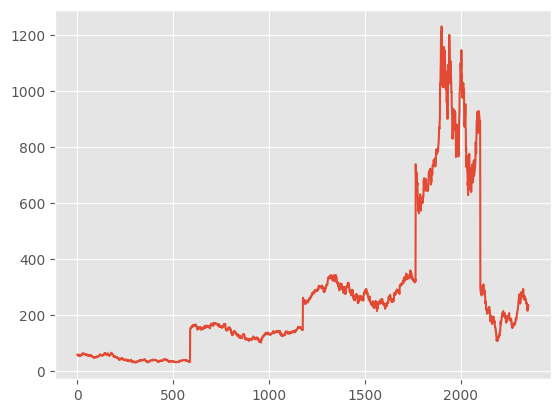

In [19]:
bars['close'].plot()

In [20]:
spy_trades = rest_api.get_trades('spy', '2021-04-26', '2021-04-26', limit=100).df
spy_trades

,exchange,price,size,conditions,id,tape
timestamp,,,,,,
2021-04-26 04:01:00+00:00,D,416.97,5100,"[ , T]",71675223952961,B
2021-04-26 04:02:19.320000+00:00,D,417.05,7,"[ , T, I]",79371804165717,B
2021-04-26 04:02:36.566000+00:00,D,417.10,1,"[ , T, I]",79371804165465,B
2021-04-26 04:03:27.531000+00:00,D,417.18,1,"[ , T, I]",79371804165712,B
2021-04-26 04:03:39.873000+00:00,D,417.20,1,"[ , T, I]",79371804165719,B
...,...,...,...,...,...,...
2021-04-26 08:09:09.618740+00:00,K,416.74,60,"[ , T, I]",52983525028662,B
2021-04-26 08:09:44.144349440+00:00,P,416.73,14,"[ , F, T, I]",52983525028146,B
2021-04-26 08:10:10.447310080+00:00,P,416.75,500,"[ , F, T]",52983525028147,B


In [21]:
#trades tick data of spy
spy_quotes = rest_api.get_quotes('SPY', '2021-04-26', '2021-04-26', limit=100).df
spy_quotes

,ask_exchange,ask_price,ask_size,bid_exchange,bid_price,bid_size,conditions,tape
timestamp,,,,,,,,
2021-04-26 08:00:00.011777024+00:00,P,0.00,0,P,398.64,1,[R],B
2021-04-26 08:00:00.011778304+00:00,P,0.00,0,P,414.50,1,[R],B
2021-04-26 08:00:00.011813632+00:00,P,0.00,0,P,415.67,10,[R],B
2021-04-26 08:00:00.011814656+00:00,P,417.34,10,P,415.67,10,[R],B
2021-04-26 08:00:00.011844608+00:00,P,417.34,10,P,416.66,20,[R],B
...,...,...,...,...,...,...,...,...
2021-04-26 08:00:49.616669258+00:00,P,416.80,10,K,416.73,6,[R],B
2021-04-26 08:00:49.616717824+00:00,K,416.80,10,P,416.73,5,[R],B
2021-04-26 08:00:49.779196672+00:00,K,416.80,10,P,416.73,10,[R],B


In [23]:
spy_quotes = rest_api.get_quotes('SPY', '2021-04-26',  '2021-04-26', limit='100').df
spy_quotes

,ask_exchange,ask_price,ask_size,bid_exchange,bid_price,bid_size,conditions,tape
timestamp,,,,,,,,
2021-04-26 08:00:00.011777024+00:00,P,0.00,0,P,398.64,1,[R],B
2021-04-26 08:00:00.011778304+00:00,P,0.00,0,P,414.50,1,[R],B
2021-04-26 08:00:00.011813632+00:00,P,0.00,0,P,415.67,10,[R],B
2021-04-26 08:00:00.011814656+00:00,P,417.34,10,P,415.67,10,[R],B
2021-04-26 08:00:00.011844608+00:00,P,417.34,10,P,416.66,20,[R],B
...,...,...,...,...,...,...,...,...
2021-04-26 08:00:49.616669258+00:00,P,416.80,10,K,416.73,6,[R],B
2021-04-26 08:00:49.616717824+00:00,K,416.80,10,P,416.73,5,[R],B
2021-04-26 08:00:49.779196672+00:00,K,416.80,10,P,416.73,10,[R],B
